In [133]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [134]:
import numpy as np
import pandas as pd

In [135]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [136]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [137]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [138]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [139]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [140]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [141]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [142]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [143]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [144]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [145]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [146]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [147]:
# latest Date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


# Exploratory Climate Analysis

In [148]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [149]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [150]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [151]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df.set_index('date' )
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [152]:
df.dropna()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00
10,2016-08-25,0.00


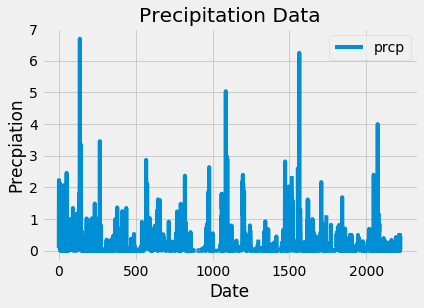

In [153]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Data")
plt.xlabel("Date")
plt.ylabel("Precpiation")
plt.show()

In [154]:
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [155]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Station).group_by(Station.name).count()
print(locations)

9


In [156]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
act_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [157]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

avg_temp = session.query(*sel).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()
avg_temp

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [158]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [159]:
active_station = avg_temp[0]

active_station_12_months=session.query(Measurement.date,Measurement.tobs).\
filter(Measurement.station==active_station).\
filter(Measurement.date>='2016-08-23').\
order_by(Measurement.date).all()

In [160]:
active_station_df =pd.DataFrame(active_station_12_months,columns=['date','tobs'])

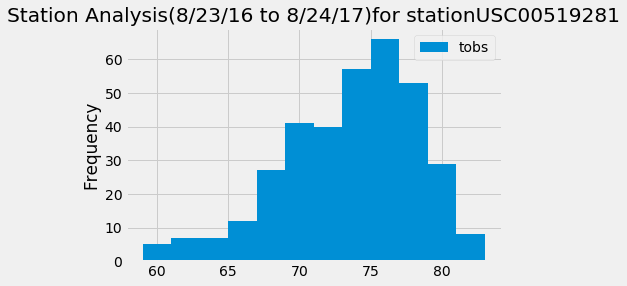

In [161]:
active_station_df.plot.hist(bins=12)
plt.title("Station Analysis(8/23/16 to 8/24/17)for station" + active_station)
plt.show()

In [162]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [163]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-02-28','2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [164]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
range_temp = (calc_temps('2016-02-28','2016-03-05'))

In [165]:
range_temp


[(62.0, 69.88636363636364, 80.0)]

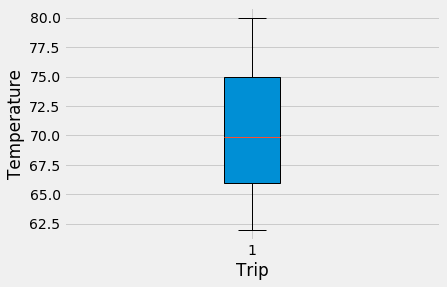

In [166]:
#plotting the data as a boxplot
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Create lists for the plot
fig,ax = plt.subplots()
x = range(len(range_temp))
ax.boxplot(range_temp,patch_artist= True)
ax.set_title =('Trip Average Temparature')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
plt.show()


In [167]:
# Creating table for date and tobs:
tobs_results=session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >='2016-02-28', Measurement.date <='2016-03-05').\
    order_by (Measurement.date).all()

In [168]:
calc_temp_df = pd.DataFrame(tobs_results, columns =['date','tobs'])
calc_temp_df.set_index('date')
calc_temp_df.head()

,date,tobs
0,2016-02-28,68.0
1,2016-02-28,80.0
2,2016-02-28,76.0
3,2016-02-28,67.0
4,2016-02-28,71.0


In [173]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall = [Measurement.station, func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
rainfall_merge = session.query(*rainfall).filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= '2016-08-23' ).\
                    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()




In [174]:
rainfall_merge

[('USC00516128', 147.81000000000006, 21.3331, -157.8025, 152.4),
 ('USC00519281', 70.03000000000003, 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 48.510000000000026, 21.4234, -157.8015, 14.6),
 ('USC00519523', 38.01, 21.33556, -157.71139, 19.5),
 ('USC00514830', 33.239999999999995, 21.5213, -157.8374, 7.0),
 ('USC00519397', 16.089999999999986, 21.2716, -157.8168, 3.0),
 ('USC00517948', 4.59, 21.3934, -157.9751, 11.9)]

In [175]:
rainfall_df = pd.DataFrame(rainfall_merge,columns=["Station","Prcp","latitude","Longitude","elevation"])

In [176]:
rainfall_df.head()

,Station,Prcp,latitude,Longitude,elevation
0,USC00516128,147.81,21.33310,-157.80250,152.4
1,USC00519281,70.03,21.45167,-157.84889,32.9
2,USC00513117,48.51,21.42340,-157.80150,14.6
3,USC00519523,38.01,21.33556,-157.71139,19.5
4,USC00514830,33.24,21.52130,-157.83740,7.0


## Optional Challenge Assignment

In [68]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


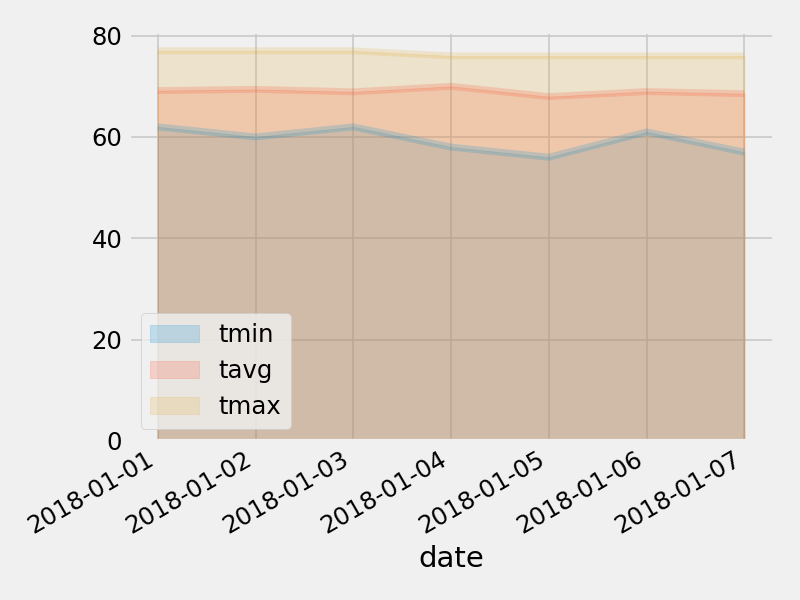

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
